# BU5241 Non-HDB Price Analysis #

In [1]:
# BU5241 Non-HDB Price Analysis 

# Things I will need for the API

access_key = "e2e32d97-81f1-4e6f-9fe7-47f95c0ff905"

# token = "dfeTx7Sarf@c432KWg-7eBwaneN4e5A5f9VS4g6jy95p9R-Rf4kh116mYh5U-TDNfJqea6ec1s-WffTa73g4p-9e9s4Ap794TK6G"


In [2]:
# Importing necessary packages 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from ura_api import ura_api


ura = ura_api.ura_api(access_key)

In [3]:
# Store the resulting json file in dataframe (currently in list format)

df_dict = ura.private_residential_property_transactions()

In [4]:
for i in df_dict:
    print(i)


{'street': 'ZEHNDER ROAD', 'x': '22734.9253', 'project': 'LANDED HOUSING DEVELOPMENT', 'y': '29502.42071', 'transaction': [{'area': '524.3', 'floorRange': '-', 'noOfUnits': '1', 'contractDate': '0220', 'typeOfSale': '3', 'price': '5500000', 'propertyType': 'Semi-detached', 'district': '05', 'typeOfArea': 'Land', 'tenure': 'Freehold'}, {'area': '308', 'floorRange': '-', 'noOfUnits': '1', 'contractDate': '0918', 'typeOfSale': '3', 'price': '5000000', 'propertyType': 'Semi-detached', 'district': '05', 'typeOfArea': 'Land', 'tenure': 'Freehold'}, {'area': '314', 'floorRange': '-', 'noOfUnits': '1', 'contractDate': '0618', 'typeOfSale': '3', 'price': '4750000', 'propertyType': 'Semi-detached', 'district': '05', 'typeOfArea': 'Land', 'tenure': 'Freehold'}, {'area': '308', 'floorRange': '-', 'noOfUnits': '1', 'contractDate': '0921', 'typeOfSale': '3', 'price': '5200000', 'propertyType': 'Semi-detached', 'district': '05', 'typeOfArea': 'Land', 'tenure': 'Freehold'}], 'marketSegment': 'RCR'}
{'

In [5]:
df = pd.DataFrame.from_dict(df_dict)


df

street                 x                       project  \
0         ZEHNDER ROAD        22734.9253    LANDED HOUSING DEVELOPMENT   
1    NEO PEE TECK LANE  20914.1988965525    LANDED HOUSING DEVELOPMENT   
2           COVE DRIVE       28382.47067                     TURQUOISE   
3    BUKIT TERESA ROAD       27054.52601    LANDED HOUSING DEVELOPMENT   
4       ALEXANDRA VIEW       26204.50079                         ARTRA   
..                 ...               ...                           ...   
289         COVE GROVE       28366.75045    LANDED HOUSING DEVELOPMENT   
290     ALEXANDRA VIEW        26074.4211  THE METROPOLITAN CONDOMINIUM   
291     WESTRIDGE WALK        23178.2986    LANDED HOUSING DEVELOPMENT   
292      KIM TIAN ROAD       27603.58585           HIGHLINE RESIDENCES   
293      FABER HEIGHTS       19547.85969                   FABER CREST   

                    y                                        transaction  \
0         29502.42071  [{'area': '524.3', 'floorRange': '-', 'noOfUni...   
1    30589.1070785135  [{'area': '159.3', 'floorRange': '-', 'noOfUni...   
2         25008.33592  [{'area': '224', 'floorRange': '01-05', 'noOfU...   
3         28712.63181  [{'area': '435.2', 'floorRange': '-', 'noOfUni...   
4         30270.56219  [{'area': '104', 'floorRange': '21-25', 'noOfU...   
..                ...                                                ...   
289       24714.72787  [{'area': '852.6', 'floorRange': '-', 'noOfUni...   
290       30319.95369  [{'area': '132', 'floorRange': '26-30', 'noOfU...   
291       28916.22014  [{'area': '214.1', 'floorRange': '-', 'noOfUni...   
292       29605.25187  [{'area': '47', 'floorRange': '06-10', 'noOfUn...   
293       33943.45546  [{'area': '94', 'floorRange': '01-05', 'noOfUn...   

    marketSegment  
0             RCR  
1             RCR  
2             CCR  
3             RCR  
4             RCR  
..            ...  
289           CCR  
290           RCR  
291           RCR  
292           RCR  
293           OCR  

[294 rows x 6 columns]

In [6]:
# Make every transaction into a single record

df = df.explode('transaction')

In [7]:
# Sanity Check 
df

street                 x                     project  \
0         ZEHNDER ROAD        22734.9253  LANDED HOUSING DEVELOPMENT   
0         ZEHNDER ROAD        22734.9253  LANDED HOUSING DEVELOPMENT   
0         ZEHNDER ROAD        22734.9253  LANDED HOUSING DEVELOPMENT   
0         ZEHNDER ROAD        22734.9253  LANDED HOUSING DEVELOPMENT   
1    NEO PEE TECK LANE  20914.1988965525  LANDED HOUSING DEVELOPMENT   
..                 ...               ...                         ...   
293      FABER HEIGHTS       19547.85969                 FABER CREST   
293      FABER HEIGHTS       19547.85969                 FABER CREST   
293      FABER HEIGHTS       19547.85969                 FABER CREST   
293      FABER HEIGHTS       19547.85969                 FABER CREST   
293      FABER HEIGHTS       19547.85969                 FABER CREST   

                    y                                        transaction  \
0         29502.42071  {'area': '524.3', 'floorRange': '-', 'noOfUnit...   
0         29502.42071  {'area': '308', 'floorRange': '-', 'noOfUnits'...   
0         29502.42071  {'area': '314', 'floorRange': '-', 'noOfUnits'...   
0         29502.42071  {'area': '308', 'floorRange': '-', 'noOfUnits'...   
1    30589.1070785135  {'area': '159.3', 'floorRange': '-', 'noOfUnit...   
..                ...                                                ...   
293       33943.45546  {'area': '173', 'floorRange': '01-05', 'noOfUn...   
293       33943.45546  {'area': '94', 'floorRange': '01-05', 'noOfUni...   
293       33943.45546  {'area': '94', 'floorRange': '01-05', 'noOfUni...   
293       33943.45546  {'area': '165', 'floorRange': '01-05', 'noOfUn...   
293       33943.45546  {'area': '125', 'floorRange': '01-05', 'noOfUn...   

    marketSegment  
0             RCR  
0             RCR  
0             RCR  
0             RCR  
1             RCR  
..            ...  
293           OCR  
293           OCR  
293           OCR  
293           OCR  
293           OCR  

[23655 rows x 6 columns]

In [8]:
# Coerce all the details of transactions into a separate dataframe

temp_df = pd.DataFrame()

for i in range(0, len(df)):
    temp_df = pd.concat([temp_df,pd.DataFrame.from_records([df.iloc[i]['transaction']])])



In [9]:
# Drop the original transaction column

df = df.drop('transaction', axis = 1)

# Reorder the dataframe for neatness 

cols = df.columns.tolist()

cols = ['street','x','y','project','marketSegment']

df = df[cols]

df

street                 x                 y  \
0         ZEHNDER ROAD        22734.9253       29502.42071   
0         ZEHNDER ROAD        22734.9253       29502.42071   
0         ZEHNDER ROAD        22734.9253       29502.42071   
0         ZEHNDER ROAD        22734.9253       29502.42071   
1    NEO PEE TECK LANE  20914.1988965525  30589.1070785135   
..                 ...               ...               ...   
293      FABER HEIGHTS       19547.85969       33943.45546   
293      FABER HEIGHTS       19547.85969       33943.45546   
293      FABER HEIGHTS       19547.85969       33943.45546   
293      FABER HEIGHTS       19547.85969       33943.45546   
293      FABER HEIGHTS       19547.85969       33943.45546   

                        project marketSegment  
0    LANDED HOUSING DEVELOPMENT           RCR  
0    LANDED HOUSING DEVELOPMENT           RCR  
0    LANDED HOUSING DEVELOPMENT           RCR  
0    LANDED HOUSING DEVELOPMENT           RCR  
1    LANDED HOUSING DEVELOPMENT           RCR  
..                          ...           ...  
293                 FABER CREST           OCR  
293                 FABER CREST           OCR  
293                 FABER CREST           OCR  
293                 FABER CREST           OCR  
293                 FABER CREST           OCR  

[23655 rows x 5 columns]

In [10]:
# "left join" the 2 dataframes together 

df = pd.concat([df.reset_index(drop=True),temp_df.reset_index(drop=True)], axis=1)

df

street                 x                 y  \
0           ZEHNDER ROAD        22734.9253       29502.42071   
1           ZEHNDER ROAD        22734.9253       29502.42071   
2           ZEHNDER ROAD        22734.9253       29502.42071   
3           ZEHNDER ROAD        22734.9253       29502.42071   
4      NEO PEE TECK LANE  20914.1988965525  30589.1070785135   
...                  ...               ...               ...   
23650      FABER HEIGHTS       19547.85969       33943.45546   
23651      FABER HEIGHTS       19547.85969       33943.45546   
23652      FABER HEIGHTS       19547.85969       33943.45546   
23653      FABER HEIGHTS       19547.85969       33943.45546   
23654      FABER HEIGHTS       19547.85969       33943.45546   

                          project marketSegment   area floorRange noOfUnits  \
0      LANDED HOUSING DEVELOPMENT           RCR  524.3          -         1   
1      LANDED HOUSING DEVELOPMENT           RCR    308          -         1   
2      LANDED HOUSING DEVELOPMENT           RCR    314          -         1   
3      LANDED HOUSING DEVELOPMENT           RCR    308          -         1   
4      LANDED HOUSING DEVELOPMENT           RCR  159.3          -         1   
...                           ...           ...    ...        ...       ...   
23650                 FABER CREST           OCR    173      01-05         1   
23651                 FABER CREST           OCR     94      01-05         1   
23652                 FABER CREST           OCR     94      01-05         1   
23653                 FABER CREST           OCR    165      01-05         1   
23654                 FABER CREST           OCR    125      01-05         1   

      contractDate typeOfSale    price   propertyType district typeOfArea  \
0             0220          3  5500000  Semi-detached       05       Land   
1             0918          3  5000000  Semi-detached       05       Land   
2             0618          3  4750000  Semi-detached       05       Land   
3             0921          3  5200000  Semi-detached       05       Land   
4             0320          3  2630000        Terrace       05       Land   
...            ...        ...      ...            ...      ...        ...   
23650         1022          3  1870000    Condominium       05     Strata   
23651         0223          3  1150000    Condominium       05     Strata   
23652         1222          3  1150000    Condominium       05     Strata   
23653         0222          3  1870000    Condominium       05     Strata   
23654         0222          3  1550000    Condominium       05     Strata   

                                  tenure nettPrice  
0                               Freehold       NaN  
1                               Freehold       NaN  
2                               Freehold       NaN  
3                               Freehold       NaN  
4                               Freehold       NaN  
...                                  ...       ...  
23650  99 yrs lease commencing from 1996       NaN  
23651  99 yrs lease commencing from 1996       NaN  
23652  99 yrs lease commencing from 1996       NaN  
23653  99 yrs lease commencing from 1996       NaN  
23654  99 yrs lease commencing from 1996       NaN  

[23655 rows x 16 columns]

## Now that we have done the brunt of data-preprocessing, we can do some preliminary data-cleaning (mainly conversion of data types) ##

[API Documentation](https://www.ura.gov.sg/maps/api/)

In [11]:
# Checking for any error in join statement 

print(df['nettPrice'].unique())

# Appears to be none, totally by random chance that all the records we see in dataframe preview have null nettPrice. To avoid errors during data conversion, I will just fill NaN = 0

df['nettPrice'] = df['nettPrice'].fillna(0)

[nan '1454000' '1567520' '2847680' '2644505' '2667185' '1673100' '1286400'
 '1387400' '1842700' '1463100' '2758200' '1492300' '2180400' '1782600'
 '1310700' '2030400' '1266600' '1972600' '1244600' '2008400' '1282600'
 '1482400' '1318300' '1298500' '1302300' '2179400' '2500100' '3438400'
 '2808400' '2462100' '1354000' '1254400' '1350200' '2080600' '1422400'
 '1262000' '1592100' '1367700' '2124600' '1342600' '1306100' '1314500'
 '1274200' '1242300' '1829000' '1854000' '1334200' '1926300' '1347200'
 '1908000' '2039500' '1224000' '1385200' '2848600' '1412100' '1872300'
 '1344800' '1322400' '2326200' '1370000' '1499300' '1402600' '2281792'
 '1536208' '2319180' '1489200' '2360100' '2517700' '1530400' '1560600'
 '1366600' '1375200' '1945500' '2006800' '1453500' '1334000' '2123400'
 '2002688' '2067600' '1510100' '2154700' '1521200' '2129200' '2002200'
 '1509300' '3346700' '2102800' '1573700' '5440880' '3057112' '1632000'
 '1537000' '1630000' '1674000' '1790000' '2918335' '2418000' '971000'
 '9

In [12]:
df.dtypes

# Since they are all objects, may need to force into other datatypes for better analysis 

street           object
x                object
y                object
project          object
marketSegment    object
area             object
floorRange       object
noOfUnits        object
contractDate     object
typeOfSale       object
price            object
propertyType     object
district         object
typeOfArea       object
tenure           object
nettPrice        object
dtype: object

In [13]:
# Convert street, project, marketSegment, floorRange, propertyType, typeOfArea, tenure to string 
df['street'] = df['street'].astype("string")
df['project'] = df['project'].astype("string")
df['marketSegment'] = df['marketSegment'].astype("string")
df['floorRange'] = df['floorRange'].astype("string")
df['propertyType'] = df['propertyType'].astype("string")
df['typeOfArea'] = df['typeOfArea'].astype("string")
df['tenure'] = df['tenure'].astype("string")

# Convert area to float
df['area'] = df['area'].astype("float")


# Convert noOfUnits, price, district, nettPrice to int
df['noOfUnits'] = df['noOfUnits'].astype("int")
df['price'] = df['price'].astype("int")
df['district'] = df['district'].astype("int")
df['nettPrice'] = df['nettPrice'].astype("int")

df['typeOfSale'] = df['typeOfSale'].astype("int")

# I will leave x and y alone since they are technically geospatial data, which is on a separate tier of analysis 

In [14]:
# Sanity Check 
df.dtypes


street            string
x                 object
y                 object
project           string
marketSegment     string
area             float64
floorRange        string
noOfUnits          int64
contractDate      object
typeOfSale         int64
price              int64
propertyType      string
district           int64
typeOfArea        string
tenure            string
nettPrice          int64
dtype: object

In [15]:
# The tricky part is dealing with the date types - contractDate and 

# First step is to transform the column into a string to convert to date 

df['contractDate'] = df['contractDate'].astype('string')

# Now that everything has been changed to a string, we need to do some data_processing before we can convert it to datetime 

import datetime

date_converted = []

for index, rows in df.iterrows():
    year = "20" + rows['contractDate'][2:4]
    month = rows['contractDate'][0:2]
    final_string = year + "-" + month
    date_converted.append(final_string) 

df['contractDate'] = date_converted

df['contractDate'] = pd.to_datetime(df['contractDate'])

df


street                 x                 y  \
0           ZEHNDER ROAD        22734.9253       29502.42071   
1           ZEHNDER ROAD        22734.9253       29502.42071   
2           ZEHNDER ROAD        22734.9253       29502.42071   
3           ZEHNDER ROAD        22734.9253       29502.42071   
4      NEO PEE TECK LANE  20914.1988965525  30589.1070785135   
...                  ...               ...               ...   
23650      FABER HEIGHTS       19547.85969       33943.45546   
23651      FABER HEIGHTS       19547.85969       33943.45546   
23652      FABER HEIGHTS       19547.85969       33943.45546   
23653      FABER HEIGHTS       19547.85969       33943.45546   
23654      FABER HEIGHTS       19547.85969       33943.45546   

                          project marketSegment   area floorRange  noOfUnits  \
0      LANDED HOUSING DEVELOPMENT           RCR  524.3          -          1   
1      LANDED HOUSING DEVELOPMENT           RCR  308.0          -          1   
2      LANDED HOUSING DEVELOPMENT           RCR  314.0          -          1   
3      LANDED HOUSING DEVELOPMENT           RCR  308.0          -          1   
4      LANDED HOUSING DEVELOPMENT           RCR  159.3          -          1   
...                           ...           ...    ...        ...        ...   
23650                 FABER CREST           OCR  173.0      01-05          1   
23651                 FABER CREST           OCR   94.0      01-05          1   
23652                 FABER CREST           OCR   94.0      01-05          1   
23653                 FABER CREST           OCR  165.0      01-05          1   
23654                 FABER CREST           OCR  125.0      01-05          1   

      contractDate  typeOfSale    price   propertyType  district typeOfArea  \
0       2020-02-01           3  5500000  Semi-detached         5       Land   
1       2018-09-01           3  5000000  Semi-detached         5       Land   
2       2018-06-01           3  4750000  Semi-detached         5       Land   
3       2021-09-01           3  5200000  Semi-detached         5       Land   
4       2020-03-01           3  2630000        Terrace         5       Land   
...            ...         ...      ...            ...       ...        ...   
23650   2022-10-01           3  1870000    Condominium         5     Strata   
23651   2023-02-01           3  1150000    Condominium         5     Strata   
23652   2022-12-01           3  1150000    Condominium         5     Strata   
23653   2022-02-01           3  1870000    Condominium         5     Strata   
23654   2022-02-01           3  1550000    Condominium         5     Strata   

                                  tenure  nettPrice  
0                               Freehold          0  
1                               Freehold          0  
2                               Freehold          0  
3                               Freehold          0  
4                               Freehold          0  
...                                  ...        ...  
23650  99 yrs lease commencing from 1996          0  
23651  99 yrs lease commencing from 1996          0  
23652  99 yrs lease commencing from 1996          0  
23653  99 yrs lease commencing from 1996          0  
23654  99 yrs lease commencing from 1996          0  

[23655 rows x 16 columns]

In [16]:
# Sanity Check
df.dtypes

street                   string
x                        object
y                        object
project                  string
marketSegment            string
area                    float64
floorRange               string
noOfUnits                 int64
contractDate     datetime64[ns]
typeOfSale                int64
price                     int64
propertyType             string
district                  int64
typeOfArea               string
tenure                   string
nettPrice                 int64
dtype: object

In [17]:
df

street                 x                 y  \
0           ZEHNDER ROAD        22734.9253       29502.42071   
1           ZEHNDER ROAD        22734.9253       29502.42071   
2           ZEHNDER ROAD        22734.9253       29502.42071   
3           ZEHNDER ROAD        22734.9253       29502.42071   
4      NEO PEE TECK LANE  20914.1988965525  30589.1070785135   
...                  ...               ...               ...   
23650      FABER HEIGHTS       19547.85969       33943.45546   
23651      FABER HEIGHTS       19547.85969       33943.45546   
23652      FABER HEIGHTS       19547.85969       33943.45546   
23653      FABER HEIGHTS       19547.85969       33943.45546   
23654      FABER HEIGHTS       19547.85969       33943.45546   

                          project marketSegment   area floorRange  noOfUnits  \
0      LANDED HOUSING DEVELOPMENT           RCR  524.3          -          1   
1      LANDED HOUSING DEVELOPMENT           RCR  308.0          -          1   
2      LANDED HOUSING DEVELOPMENT           RCR  314.0          -          1   
3      LANDED HOUSING DEVELOPMENT           RCR  308.0          -          1   
4      LANDED HOUSING DEVELOPMENT           RCR  159.3          -          1   
...                           ...           ...    ...        ...        ...   
23650                 FABER CREST           OCR  173.0      01-05          1   
23651                 FABER CREST           OCR   94.0      01-05          1   
23652                 FABER CREST           OCR   94.0      01-05          1   
23653                 FABER CREST           OCR  165.0      01-05          1   
23654                 FABER CREST           OCR  125.0      01-05          1   

      contractDate  typeOfSale    price   propertyType  district typeOfArea  \
0       2020-02-01           3  5500000  Semi-detached         5       Land   
1       2018-09-01           3  5000000  Semi-detached         5       Land   
2       2018-06-01           3  4750000  Semi-detached         5       Land   
3       2021-09-01           3  5200000  Semi-detached         5       Land   
4       2020-03-01           3  2630000        Terrace         5       Land   
...            ...         ...      ...            ...       ...        ...   
23650   2022-10-01           3  1870000    Condominium         5     Strata   
23651   2023-02-01           3  1150000    Condominium         5     Strata   
23652   2022-12-01           3  1150000    Condominium         5     Strata   
23653   2022-02-01           3  1870000    Condominium         5     Strata   
23654   2022-02-01           3  1550000    Condominium         5     Strata   

                                  tenure  nettPrice  
0                               Freehold          0  
1                               Freehold          0  
2                               Freehold          0  
3                               Freehold          0  
4                               Freehold          0  
...                                  ...        ...  
23650  99 yrs lease commencing from 1996          0  
23651  99 yrs lease commencing from 1996          0  
23652  99 yrs lease commencing from 1996          0  
23653  99 yrs lease commencing from 1996          0  
23654  99 yrs lease commencing from 1996          0  

[23655 rows x 16 columns]

## Now that we have a dataframe with values that we can work with, we can do some basic plotting. ##

### Median Private Property Prices against Time ###

<Axes: xlabel='contractDate'>

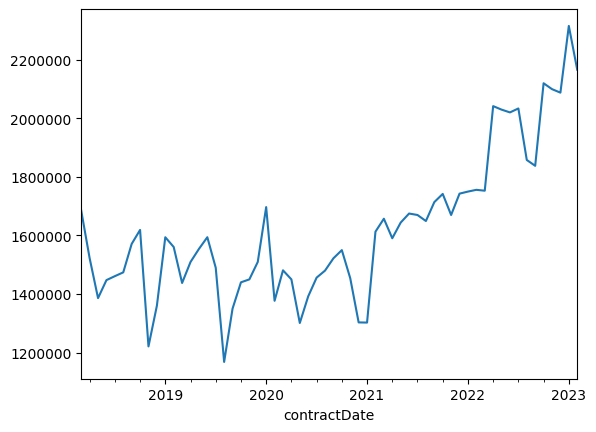

In [18]:
# Now we can do some plotting 

# Basic Time series of average price against contract date 

contract_grouped = df.groupby('contractDate')

# I did median over here because mean can be influenced by ridiculous sales or months with low sales

averaged = contract_grouped.price.median()

plt.ticklabel_format(style='plain') # preventing scientific notation
averaged.plot()

# High variance in prices, but i think we observe a general upward trend overall for private housing. 


### Median Private Property Houses against Time by Type of House (Condominium, Terrace, Semi-detached) ###

In general, what we observe is that there has been an increase in property prices from 2020 onwards

#### Note: There are other types of houses in the dataset as well, such as Strata Detached, Strata Semi-detached, Executive Condominium, but for the sake of simplicity I will narrow down to these 3 sub-groups ####

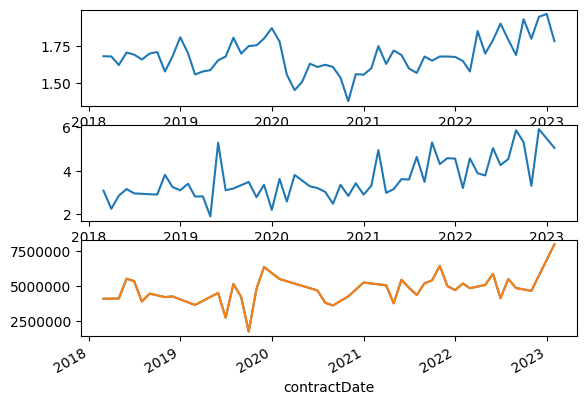

In [19]:

fig,ax = plt.subplots(3)

# Condominium
condominiums = df[df['propertyType'] == 'Condominium']
condominiums_grouped = condominiums.groupby('contractDate')
condominiums_averaged = condominiums_grouped.price.median()
plt.ticklabel_format(style='plain') # preventing scientific notation

# Terrace
terrace = df[df['propertyType'] == 'Terrace']
terrace_grouped = terrace.groupby('contractDate')
terrace_averaged = terrace_grouped.price.median()
plt.ticklabel_format(style='plain') # preventing scientific notation

# Semi-detached 
semi_detached = df[df['propertyType'] == 'Semi-detached']
semi_detached_grouped = semi_detached.groupby('contractDate')
semi_detached_averaged = semi_detached_grouped.price.median()
plt.ticklabel_format(style='plain') # preventing scientific notation
semi_detached_averaged.plot()


ax[0].plot(condominiums_averaged)
ax[0].xaxis.get_offset_text().set_visible(False)
ax[0].yaxis.get_offset_text().set_visible(False)
ax[1].plot(terrace_averaged)
ax[1].xaxis.get_offset_text().set_visible(False)
ax[1].yaxis.get_offset_text().set_visible(False)
ax[2].plot(semi_detached_averaged)
ax[2].xaxis.get_offset_text().set_visible(False)
ax[2].yaxis.get_offset_text().set_visible(False)


# I will change the axis figures later


### Does geographical location affect price? ###

Market Segment refers to the geographical region that the property falls in.

CCR - Core Central Region 
RCR - Rest of Central Region 
OCR - Outside Central Region

#### From the graph, it is easy to observe (and also relatively easy to conclude without data) that location is an important factor in housing prices. Median house prices in the Core Central region are the highest, while Median house prices outside the central region are the lowest.

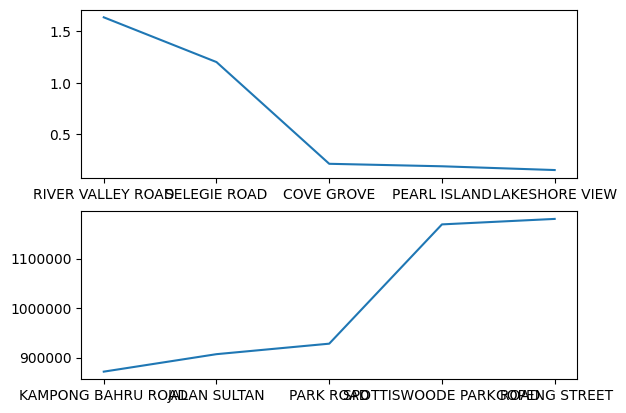

In [20]:
### WIP, there are some technical issues here since we are not sorting correctly)


# Grouping by street

fig,ax = plt.subplots(2)

street_grouped = df.groupby('street')
street_averaged = street_grouped.price.median()
plt.ticklabel_format(style='plain') # preventing scientific notation


street_averaged_desc = street_averaged.sort_values(ascending=False).head(5)

street_averaged_asc = street_averaged.sort_values().head(5)


ax[0].plot(street_averaged_desc)
ax[0].xaxis.get_offset_text().set_visible(False)
ax[0].yaxis.get_offset_text().set_visible(False)
ax[1].plot(street_averaged_asc)
ax[1].xaxis.get_offset_text().set_visible(False)
ax[1].yaxis.get_offset_text().set_visible(False)


# street_averaged.plot(kind='barh')
# plt.rc('xtick',labelsize=6)
# plt.xticks(rotation=40)


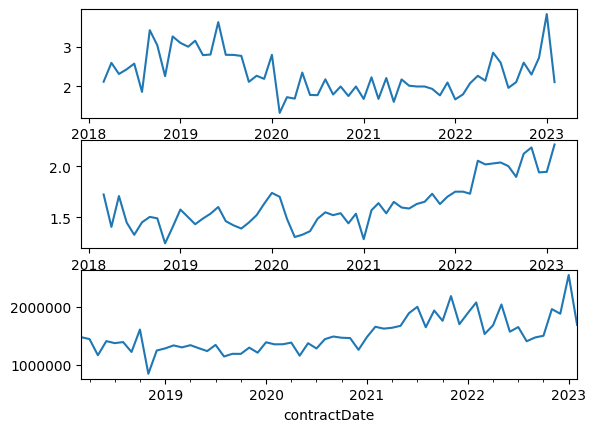

In [21]:
fig,ax = plt.subplots(3)

# CCR
ccr = df[df['marketSegment'] == 'CCR']
ccr_grouped = ccr.groupby('contractDate')
ccr_averaged = ccr_grouped.price.median()
plt.ticklabel_format(style='plain') # preventing scientific notation

# RCR
rcr = df[df['marketSegment'] == 'RCR']
rcr_grouped = rcr.groupby('contractDate')
rcr_averaged = rcr_grouped.price.median()
plt.ticklabel_format(style='plain') # preventing scientific notation

# OCR 
ocr = df[df['marketSegment'] == 'OCR']
ocr_grouped = ocr.groupby('contractDate')
ocr_averaged = ocr_grouped.price.median()
plt.ticklabel_format(style='plain') # preventing scientific notation
ocr_averaged.plot()


ax[0].plot(ccr_averaged)
ax[0].xaxis.get_offset_text().set_visible(False)
ax[0].yaxis.get_offset_text().set_visible(False)
ax[1].plot(rcr_averaged)
ax[1].xaxis.get_offset_text().set_visible(False)
ax[1].yaxis.get_offset_text().set_visible(False)
ax[2].plot(ocr_averaged)
ax[2].xaxis.get_offset_text().set_visible(False)
ax[2].yaxis.get_offset_text().set_visible(False)


# I will change the axis figures later

### Area vs Price ###

#### WIP please give me time :( ####

<Axes: xlabel='area'>

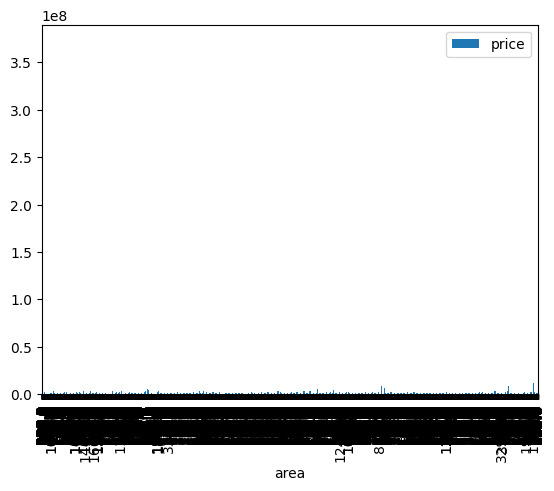

In [22]:
# df.plot(x='area',y='price',kind='bar')

### Floor Range vs Price ### 

#### The hypothesis is that this thing shouldn't really affect the price, but it could be possible that buildings with high floors are generally more expensive to own 

<Axes: xlabel='floorRange'>

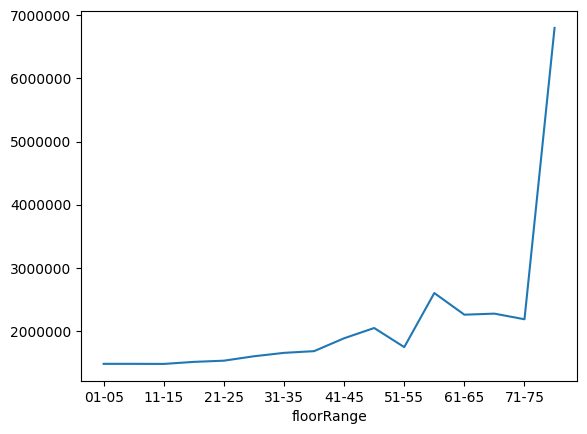

In [26]:
# Excluding buildings with no floor (we will presume they are big , which we will analyze later)

floors = df[df['floorRange'] != '-']

floors_grouped = floors.groupby('floorRange')

floors_averaged = floors_grouped.price.median()

plt.ticklabel_format(style='plain')

floors_averaged.plot()

# ... This result is honestly stupidly funny 


#### Tenure vs Price


### The simple hypothesis here is that generally people will pay more for longer leases (999 years) / freehold land against 99 years

In [28]:
print(df['tenure'].unique())

### Holy shit there is some really old data here, 999 years least commencing from 1885? wtf? 

<StringArray>
[                           'Freehold',   '99 yrs lease commencing from 2007',
   '99 yrs lease commencing from 2016', '9999 yrs lease commencing from 1963',
   '99 yrs lease commencing from 1976',   '99 yrs lease commencing from 2014',
   '99 yrs lease commencing from 2006',   '99 yrs lease commencing from 2005',
   '99 yrs lease commencing from 2011',   '99 yrs lease commencing from 2019',
   '99 yrs lease commencing from 1996',   '99 yrs lease commencing from 2008',
   '99 yrs lease commencing from 2018',  '956 yrs lease commencing from 1928',
   '99 yrs lease commencing from 2002',   '99 yrs lease commencing from 2012',
   '99 yrs lease commencing from 1997',   '99 yrs lease commencing from 2013',
   '99 yrs lease commencing from 1993',   '99 yrs lease commencing from 1994',
   '99 yrs lease commencing from 1980',  '999 yrs lease commencing from 1966',
   '99 yrs lease commencing from 1995',  '999 yrs lease commencing from 1827',
  '999 yrs lease commencing from 1885'

### Type of 

1 – New Sale -- we need to use nettprice and not price, as they are eligible for grants etc etc
2 – Sub Sale 
3 – Resale

## Other things I am considering 

### Tenure (freehold or lease?), District (very similar to marketSegment to be honest), floorRange (would i pay more for a HDB flat that is high up? honestly yes, so i can always jump out the fucking window anytime lmao), typeOfSales (resale vs newsale)